In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import os, sys
%matplotlib inline

from IPython.display import display, HTML

if (sys.version_info < (3, 0)):
    HTML('''<script>
    code_show=true; 
    function code_toggle() {
     if (code_show){
     $('div.input').hide();
     } else {
     $('div.input').show();
     }
     code_show = !code_show
    } 
    $( document ).ready(code_toggle);
    </script>
    <form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')


In [2]:
working_dir = r'../../../outputs/agg/dash'
pd.options.display.float_format = '{:0,.0f}'.format
format_percent = "{:,.2%}".format

In [3]:
def load_data(fname):
    """ open and join model and survey data """

    df_model = pd.read_csv(os.path.join(working_dir,fname+'.csv'))
    df_model['source'] = 'model'
    df_survey = pd.read_csv(os.path.join(working_dir,'survey',fname+'.csv'))
    df_survey['source'] = 'survey'
    df = df_model.append(df_survey)

    return df

# Total Persons

In [4]:
df = load_data('person_type')
df.groupby('source').sum()[['psexpfac']].T

source,model,survey
psexpfac,"4,053,154","4,051,248"


# Total Households

In [5]:
df = load_data('household_size_vehs_workers')
df.groupby('source').sum()[['hhexpfac']].T

source,model,survey
hhexpfac,"1,605,263","1,656,512"


# Total Trips

In [6]:
df = load_data('trip_purpose_mode')
df.groupby('source').sum()[['trexpfac']].T

source,model,survey
trexpfac,"16,331,839","70,823,104"


# Total Tours

In [7]:
df = load_data('tour_purpose_mode')
df.groupby('source').sum()[['toexpfac']].T

source,model,survey
toexpfac,"6,419,404","11,919,017"


## Average Household Size

In [8]:
pd.options.display.float_format = '{:0,.2f}'.format
df = load_data('household_size_vehs_workers')
pd.DataFrame(
    df.groupby('source').apply(
        lambda row: ((row['hhsize']*1.0*row['hhexpfac']*1.0).sum())/row['hhexpfac'].sum()*1.0),
        columns=['avg_hh_size'])

,avg_hh_size
source,
model,2.52
survey,2.45


## Average Trips per Person

## Average Distance to Work

In [9]:
df = load_data('trip_averages')
df[df['dpurp'] == 'Work'].groupby(['mode','source']).mean()

travdist  travtime  travcost
mode       source                              
Bike       model       5.12     34.11      0.00
           survey      3.72     21.41      0.22
HOV2       model       9.06     20.97      0.00
           survey      5.82     19.58      0.42
HOV3+      model       9.30     21.27      0.00
           survey      7.10     17.75      0.24
SOV        model       9.33     21.86      0.00
           survey      7.67     19.35      0.17
School Bus model       4.01     12.14      0.00
           survey      4.71     12.45      0.00
TNC        model       2.20     10.04      0.00
           survey      4.12     17.23      0.45
Transit    model      10.28     41.95      0.00
           survey      6.46     30.50      2.30
Walk       model       0.68     13.57      0.00
           survey      1.61     17.39      0.20

## Average Distance to School

In [10]:
df[df['dpurp'] == 'School'].groupby(['mode','source']).mean()

travdist  travtime  travcost
mode       source                              
Bike       model       2.83     18.90      0.00
           survey      2.90     15.89      0.00
HOV2       model       3.23     10.52      0.00
           survey      3.68     11.98      0.18
HOV3+      model       3.37     10.78      0.00
           survey      4.19     12.95      0.02
SOV        model       6.10     15.77      0.00
           survey      5.73     16.92      0.10
School Bus model       3.12     10.39      0.00
           survey      2.21      8.58      0.05
TNC        model       2.35      9.31      0.00
           survey      2.71     13.03      0.43
Transit    model       5.78     36.13      0.00
           survey      4.36     18.41      1.98
Walk       model       1.35     26.95      0.00
           survey      1.19     14.55      0.22

## Transit Pass Ownership

In [11]:
pd.options.display.float_format = '{:0,.0f}'.format
df = load_data('parking_transit_pass')
pd.pivot_table(df, index='ptpass',columns='source',values='psexpfac',aggfunc='sum')

source,model,survey
ptpass,,
0,"3,292,947","3,264,963"
1,"760,207","786,285"


In [12]:
pd.pivot_table(df[df['ptpass']==1], 
               index='pptyp',columns='source',values='psexpfac',aggfunc='sum')

source,model,survey
pptyp,,
Child Age 5-15,"2,052","9,796"
Full-Time Worker,"486,201","709,233"
High School Student Age 16+,"128,383","5,549"
Non-Working Adult Age 65+,543,329
Non-Working Adult Age <65,"18,171",nan
Part-Time Worker,"41,615","44,097"
University Student,"83,242","15,414"


# Auto Ownership

In [26]:
df = load_data('auto_ownership')
df.loc[df['hhvehs'] >= 3, 'hhvehs'] = '3+'
df.pivot_table(index='hhvehs', columns='source', aggfunc='sum', values='hhexpfac')

source,model,survey
hhvehs,,
0.0,"109,122","128,071"
1.0,"580,849","512,078"
2.0,"551,829","620,394"
3+,"339,753","377,345"


## By Income

In [13]:
df = load_data('auto_ownership')

# Define income groups
inc_bin=[-1,20000,40000,60000,75000,9999999999999]
inc_bin_labels = ['0-$20k','$20-40k','$40-60k','$60-75k','>$75k']
df['income_bin'] = pd.cut(df['hhincome_thousands'], bins=inc_bin, labels=inc_bin_labels)

df.loc[df['hhvehs'] >= 4, 'hhvehs'] = '4+'

pd.pivot_table(df, index=['hhvehs','source'], columns='income_bin', values='hhexpfac', aggfunc='sum')

income_bin     0-$20k  $20-40k  $40-60k  $60-75k   >$75k
hhvehs source                                           
0.0    model   44,581   23,569   13,109    4,292  23,565
       survey  62,425   27,901   17,279      nan  20,465
1.0    model  128,438  118,277   94,326   35,002 204,713
       survey 138,715  102,527  110,953      nan 159,884
2.0    model   29,157   50,518   71,326   36,259 364,553
       survey  90,479   83,871   75,214      nan 370,829
3.0    model    5,614   11,647   19,847   10,834 175,570
       survey  46,620   19,428   22,998      nan 175,287
4+     model    1,613    3,848   10,391    5,859  94,527
       survey   6,152      486   13,427      nan  92,947

In [14]:
pd.options.display.float_format = "{:,.2%}".format
_df_model = pd.pivot_table(df[df['source'] == 'model'], index='hhvehs', columns='hh_county', values='hhexpfac', aggfunc='sum')
_df_model = _df_model/_df_model.sum()
_df_survey = pd.pivot_table(df[df['source'] == 'survey'], index='hhvehs', columns='hh_county', values='hhexpfac', aggfunc='sum')
_df_survey = _df_survey/_df_survey.sum()

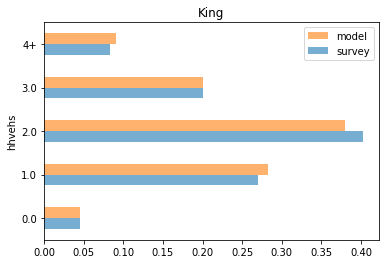

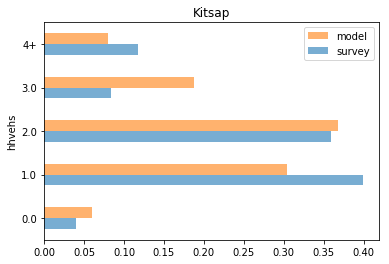

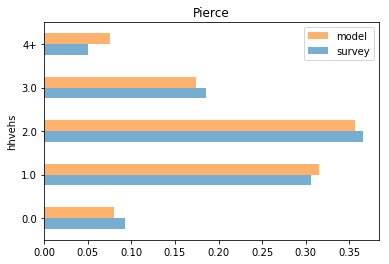

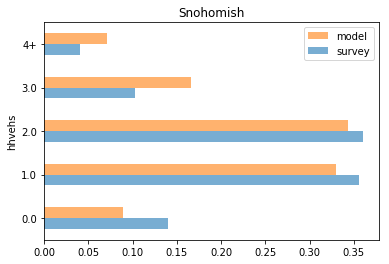

In [15]:
for county in df['hh_county'].unique():
    _df = pd.DataFrame([_df_survey[county],_df_model[county]]).T
    _df.columns = ['survey','model']
    _df.plot(kind='barh', title=county, legend='reverse', alpha=0.6)


## Total Workers by Home County
Model

In [16]:
df = load_data('work_flows')
pd.options.display.float_format = '{:0,.0f}'.format
df.rename(columns={'person_county': 'Home County', 'person_work_county':'Work County'}, inplace=True)

pd.pivot_table(df[df['source'] == 'model'], index='Home County', columns='Work County', aggfunc='sum')

psexpfac                         
Work County     King Kitsap  Pierce Snohomish
Home County                                  
King         448,988 31,619  93,371   142,997
Kitsap        13,986 30,602  49,401    90,453
Pierce        44,095 42,992 161,763   209,718
Snohomish     33,360 49,233 123,814   267,357